# Segment 2: Eigendecomposition

## Affine Transformations via Matrix Application ##

Let's say we have a vector v:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
v = np.array([3,1])
v

array([3, 1])

In [3]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each

    Args:
        vectors (_type_): list of lists or of arrays. [[1,3],[2,2]]
        colors (_type_): Colors of the vectors ['red', 'blue']
        
    Example:
        plot_vectors([[1,3],[2,2]], ['red','blue'])
        plt.xlim(-1,4)
        plt.ylim(-1,4)
    """
    plt.figure()
    plt.axvline(x=0,color='lightgray')
    plt.axhline(y=0,color='lightgray')
    
    for i in range(len(vectors)):
        x = np.concatenate([[0,0], vectors[i]])
        plt.quiver(
            [x[0]], [x[1]], [x[2]], [x[3]],
            angles='xy',
            scale_units='xy',
            scale=1,
            color=colors[i],
        )


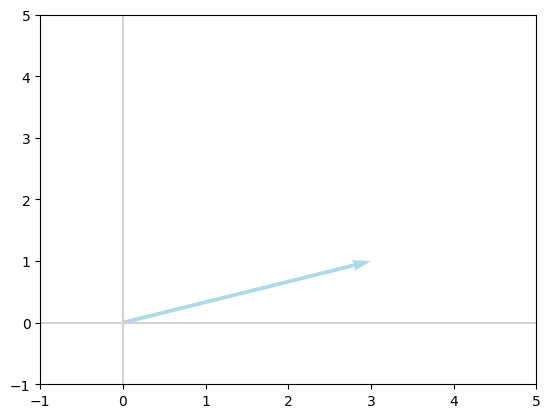

In [4]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1,5)
_=plt.ylim(-1,5)

In [5]:
I = np.array([[1,0],[0,1]])
I

array([[1, 0],
       [0, 1]])

In [6]:
Iv = np.dot(I,v)
Iv

array([3, 1])

In [7]:
v == Iv

array([ True,  True])

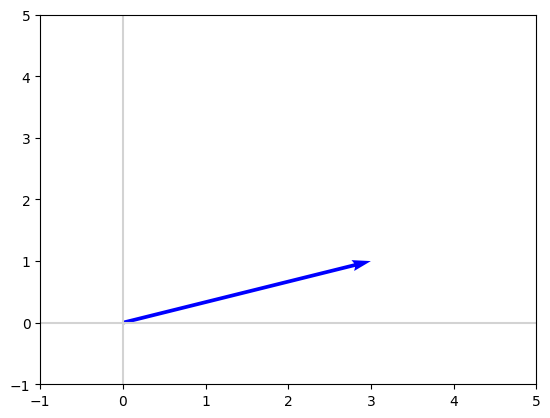

In [8]:
plot_vectors([Iv],['blue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

### Flipping Matrices

In [9]:
E = np.array([[1,0],[0,-1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [10]:
Ev = np.dot(E,v)
Ev

array([ 3, -1])

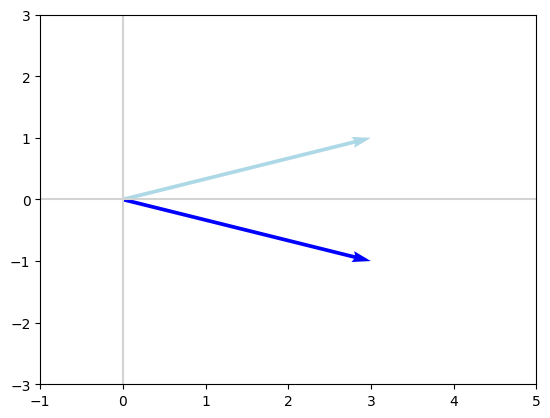

In [11]:
plot_vectors([v,Ev],['lightblue', 'blue'])
plt.xlim(-1,5)
_=plt.ylim(-3,3)

In [12]:
F = np.array([[-1,0],[0,1]])
F

array([[-1,  0],
       [ 0,  1]])

In [13]:
Fv = np.dot(F,v)
Fv

array([-3,  1])

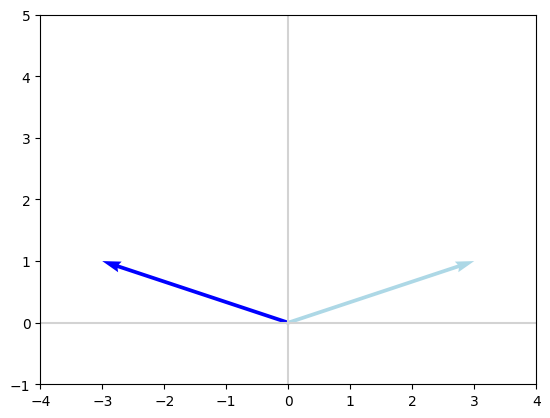

In [14]:
plot_vectors([v,Fv], ['lightblue','blue'])
plt.xlim(-4,4)
_=plt.ylim(-1,5)

In [15]:
A = np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

In [16]:
Av = np.dot(A, v)
Av

array([1, 4])

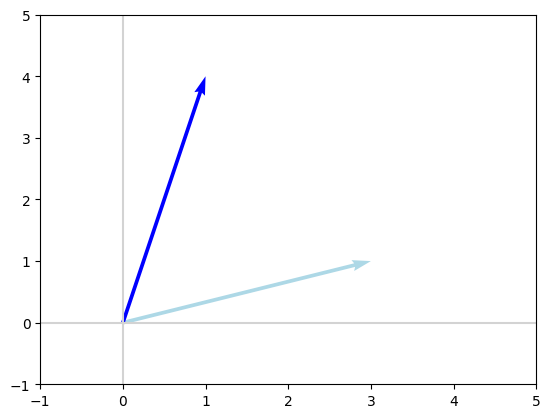

In [17]:
plot_vectors([v,Av],['lightblue','blue'])
plt.xlim(-1,5)
_=plt.ylim(-1,5)

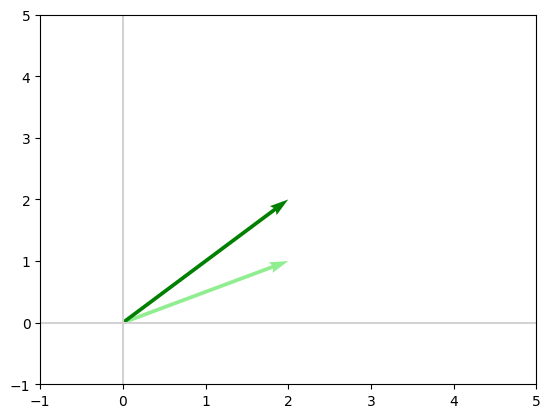

In [18]:
# Another example of applying A:
v2 = np.array([2,1])
plot_vectors([v2,np.dot(A,v2)],['lightgreen','green'])
plt.xlim(-1,5)
_=plt.ylim(-1,5)

In [19]:
v

array([3, 1])

In [20]:
np.matrix(v).T

matrix([[3],
        [1]])

In [21]:
v3 = np.array([-3,-1]) # Mirror image of v over both axes
v4 = np.array([-1,1])

In [22]:
V = np.concatenate(
    (np.matrix(v).T,
    np.matrix(v2).T,
    np.matrix(v3).T,
    np.matrix(v4).T),
    axis=1
)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [23]:
IV = np.dot(I,V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [24]:
AV = np.dot(A,V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [25]:
#  function to convert column of matrix to 1D vector:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [26]:
vectorfy(V,0)

array([3, 1])

In [27]:
vectorfy(V,0) == v

array([ True,  True])

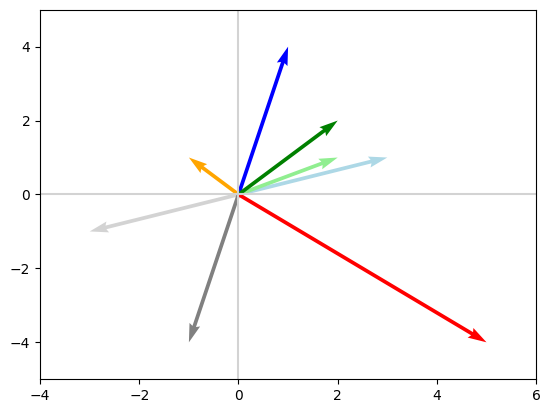

In [28]:
plot_vectors(
    [vectorfy(V,0), vectorfy(V,1), vectorfy(V,2), vectorfy(V,3), vectorfy(AV,0), vectorfy(AV,1), vectorfy(AV,2), vectorfy(AV,3)],
    ['lightblue', 'lightgreen', 'lightgray', 'orange', 'blue', 'green', 'gray', 'red']
)

plt.xlim(-4,6)
_=plt.ylim(-5,5)

# Eigenvectors and Eigenvalues #

https://www.udemy.com/course/machine-learning-data-science-foundations-masterclass/learn/lecture/25163484#questions

In [29]:
A

array([[-1,  4],
       [ 2, -2]])

In [30]:
lambdas, V = np.linalg.eig(A)

In [31]:
V # each column is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [32]:
lambdas

array([ 1.37228132, -4.37228132])

In [33]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [34]:
lambduh = lambdas[0]
lambduh

np.float64(1.3722813232690143)

In [35]:
Av = np.dot(A,v)
Av

array([1.18031462, 0.70000958])

In [36]:
lambduh * v

array([1.18031462, 0.70000958])

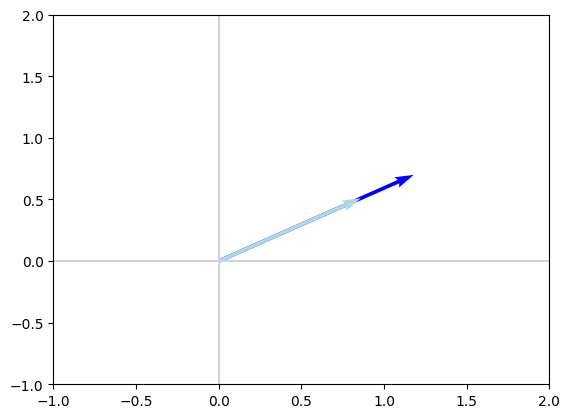

In [37]:
plot_vectors([Av,v],['blue','lightblue'])
plt.xlim(-1,2)
_=plt.ylim(-1,2)

In [38]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [39]:
lambda2 = lambdas[1]
lambda2

np.float64(-4.372281323269014)

In [40]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [41]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

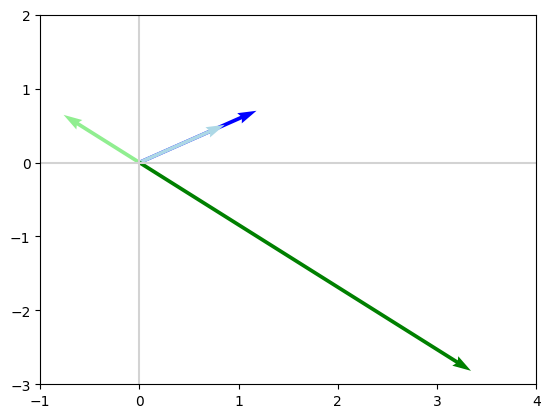

In [42]:
plot_vectors([Av,v, Av2, v2],['blue','lightblue', 'green', 'lightgreen'])
plt.xlim(-1,4)
_=plt.ylim(-3,2)

In [43]:
A

array([[-1,  4],
       [ 2, -2]])

In [44]:
A_p = torch.tensor([[-1,4],[2,-2.]], dtype=torch.float32) # must be float for PyTorch eig()
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [45]:
#eigens = torch.eig(A_p, eigenvectors=True)
eigens = torch.linalg.eig(A_p)
eigens

torch.return_types.linalg_eig(
eigenvalues=tensor([ 1.3723+0.j, -4.3723+0.j]),
eigenvectors=tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]]))

In [46]:
v_p = eigens.eigenvectors[:,0].real
v_p

tensor([0.8601, 0.5101])

In [47]:
#lambda_p = eigens.eigenvalues[0][0]
lambda_p = eigens.eigenvalues[0].item()
lambda_p

(1.3722813129425049+0j)

In [48]:
Av_p = torch.matmul(A_p, v_p)
Av_p

tensor([1.1803, 0.7000])

In [49]:
lambda_p * v_p

tensor([1.1803+0.j, 0.7000+0.j])

In [55]:
v2_p = eigens.eigenvectors[:,1].real
v2_p

tensor([-0.7645,  0.6446])

In [56]:
lambda2_p = eigens.eigenvalues[1].item()
lambda2_p

(-4.372281074523926+0j)

In [57]:
Av2_p = torch.matmul(A_p, v2_p)
Av2_p

tensor([ 3.3428, -2.8182])

In [58]:
lambda2_p * v2_p

tensor([ 3.3428-0.j, -2.8182+0.j])

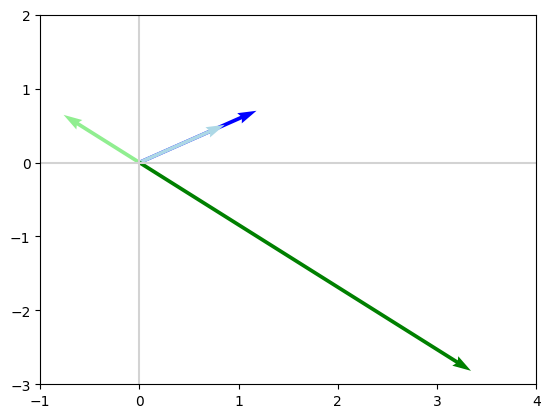

In [59]:
plot_vectors(
    [Av_p.numpy(), v_p.numpy(), Av2_p.numpy(), v2_p.numpy()],
    ['blue','lightblue','green','lightgreen']
)

plt.xlim(-1,4)
_=plt.ylim(-3,2)

## Eigenvectors in >2 Dimensions

In [60]:
X = np.array([[25,2,9],[5,26,-5],[3,7,-1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [61]:
lambdas_X, V_X = np.linalg.eig(X)

In [62]:
V_X # One eigenvector per column of X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [63]:
lambdas_X # a corresponding eigenvalue for each eigenvector

array([29.67623202, 20.62117365, -0.29740567])

In [64]:
v_X = V_X[:,0]
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [65]:
lambda_X = lambdas_X[0]
lambda_X

np.float64(29.676232023948902)

In [66]:
np.dot(X, v_X) # matrix multiplication

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [67]:
lambda_X * v_X

array([-21.12227645, -19.77983919,  -6.5792208 ])

## 2x2 Matrix Determinants

In [72]:
X = np.array([[4,2],[-5,-3]])
X

array([[ 4,  2],
       [-5, -3]])

In [77]:
np.linalg.det(X) # (4*-3)-(2*-5) = -12+10 = -2

np.float64(-2.0000000000000013)

In [79]:
N = np.array([[-4,1],[-8,2]])
N

array([[-4,  1],
       [-8,  2]])

In [80]:
np.linalg.det(N) # (-4*2)-(1*-8) = -8+8 = 0

np.float64(0.0)

In [83]:
# Uncommenting the following line results in a "singular matrix" error
# Ninv = np.linalg.inv(N)

In [85]:
N = torch.tensor([[-4,1],[-8,2.]]) # must use float not int
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [86]:
torch.det(N)

tensor(-0.)

# Determinants of Larger Matrices

In [87]:
X = np.array([[1,2,4],[2,-1,3],[0,5,1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [ ]:
'''
1(-1*1-3*5)     -   2(2*1-3*0)    +     4(2.5-(-1)*(0))
-16             -4                +40
20
'''
np.linalg.det(X)

'\n1(-1*1-3*5)     -   2(2*1-3*0)    +     4(2.5-(-1)*(0))\n-16             -4                +40\n20\n'